In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
from tqdm import tqdm

driver = webdriver.Chrome('C:/Temp/chromedriver')
driver.implicitly_wait(3)

In [8]:
# 직접 로그인
url = 'https://twitter.com/home'
driver.get(url)

In [ ]:
keywords = ['전동킥보드']
text_list = []

for keyword in keywords:
    # 트위터 접속
    url = 'https://twitter.com/home'
    driver.get(url)
    time.sleep(2)
    css_selector = '#react-root > div > div > div.css-1dbjc4n.r-18u37iz.r-13qz1uu.r-417010 > main > div > div > div > div.css-1dbjc4n.r-aqfbo4.r-zso239.r-1hycxz > div > div.css-1dbjc4n.r-gtdqiz.r-1hycxz > div > div > div > div.css-1dbjc4n.r-1awozwy.r-aqfbo4.r-14lw9ot.r-18u37iz.r-1h3ijdo.r-6gpygo.r-15ysp7h.r-1xcajam.r-ipm5af.r-1hycxz.r-136ojw6 > div > div > div > form > div.css-1dbjc4n.r-1wbh5a2 > div > div > div.css-901oao.r-18jsvk2.r-6koalj.r-16y2uox.r-1qd0xha.r-a023e6.r-16dba41.r-rjixqe.r-bcqeeo.r-qvutc0 > input'

    # 검색 키워드 클릭
    src = driver.find_element_by_css_selector(css_selector)
    src.click()

    # 검색 키워드 입력
    elem = driver.find_element_by_css_selector(css_selector)
    elem.send_keys(keyword)
    elem.send_keys(Keys.ENTER)
    time.sleep(2)

    # Latest 클릭
    src = driver.find_element_by_css_selector('#react-root > div > div > div.css-1dbjc4n.r-18u37iz.r-13qz1uu.r-417010 > main > div > div > div > div > div > div.css-1dbjc4n.r-aqfbo4.r-14lw9ot.r-j7yic.r-rull8r.r-qklmqi.r-gtdqiz.r-1gn8etr.r-1g40b8q > div.css-1dbjc4n.r-14lw9ot > nav > div > div.css-1dbjc4n.r-1adg3ll.r-16y2uox.r-1wbh5a2.r-1pi2tsx.r-1udh08x > div > div:nth-child(2) > a > div > span')
    src.click()
    time.sleep(2)

    # 스크롤
    SCROLL_PAUSE_TIME = 4

    # 스크롤 높이 
    last_height = driver.execute_script("return document.body.scrollHeight") 
    count = 0

    for scroll in range(30):
        count += 1
        # 스크롤 무빙 
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # 페이지 로드 대기 
        time.sleep(SCROLL_PAUSE_TIME) 
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight-50);") # 맨 마지막까지 스크롤하면 바로 아래 리스트가 뜨지 않는 경우가 있기 때문에 -50 추가
        time.sleep(SCROLL_PAUSE_TIME)

        # 수집
        id_selectors = driver.find_elements_by_css_selector('div.css-1dbjc4n.r-1iusvr4.r-16y2uox.r-1777fci.r-kzbkwu > div:nth-child(2) > div:nth-child(1) > div')
        for i in id_selectors:
            text_list.append(i.text)
        print(len(id_selectors), len(text_list), count)
        
        # 스크롤이 더이상 변화가 없으면 스크롤 이동 중단
        new_height = driver.execute_script("return document.body.scrollHeight") 
        if last_height == new_height:
            break
        last_height = new_height
        
    print(keyword, ': 수집완료', len(text_list))
text_set = set(text_list)
print(len(text_set))

In [ ]:
# id_selectors = driver.find_elements_by_css_selector('div.css-1dbjc4n.r-1iusvr4.r-16y2uox.r-1777fci.r-kzbkwu > div:nth-child(2) > div:nth-child(1) > div')
# id_selectors[3].text

# scr = driver.find_element_by_css_selector('section.유동인구.profile-section > article:nth-child(2) > div')
# action = ActionChains(driver)
# action.move_to_element(scr).perform()

In [10]:
import pandas as pd

# 저장 (csv)
df = pd.DataFrame({'text':text_list})
df.to_csv("data/twitter.csv", index = None)

# 전처리

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import nltk
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [7]:
# 파일 불러오기
data = pd.read_csv('data/twitter.csv')
data.drop_duplicates() # 중복행 제거

FileNotFoundError: [Errno 2] No such file or directory: 'data/twitter.csv'

In [24]:
# title data 합치기 (제거: '\n')
message = ''
for item in data['text']:
    message = message + re.sub('[^\w]', ' ', item) +''

# 정규화 (제거할 단어)
message = re.sub('자전거', '', message)
message = re.sub('바이크', '', message)
message = re.sub('공유', '', message)
message = re.sub('공공', '', message)
message = re.sub('누비자', '', message)
message = re.sub('따릉', '', message)
message = re.sub('이용', '', message)
message = re.sub('대여', '', message)
message = re.sub('타고', '', message)
message = re.sub('서울', '', message)
message = re.sub('서울시', '', message)
message = re.sub('오늘', '', message)
message = re.sub('창원', '', message)
message = re.sub('광주', '', message)
message = re.sub('수원', '', message)
message = re.sub('반디', '', message)

# message

In [25]:
# 명사 추출
nlp = Okt()
message_N = nlp.nouns(message)
# message_N

In [26]:
# 단어 빈도 확인
count = Counter(message_N)
word_count = dict()

for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print(tag,':',counts)

중국 : 183
서비스 : 101
운영 : 91
헬멧 : 91
도로 : 77
뉴스 : 70
출처 : 68
사람 : 67
의무 : 62
네이버 : 56
어디 : 56
이름 : 53
버스 : 50
정책 : 50
민간 : 49
한국 : 47
생각 : 47
무료 : 46
사업 : 46
하나요 : 46
한강 : 44
오포 : 44
도입 : 42
시간 : 40
업체 : 40
안장 : 39
근처 : 38
시민 : 38
진짜 : 38
반납 : 38
정비 : 37
시작 : 37
결제 : 36
투자 : 36
안전모 : 35
보드 : 34
도시 : 34
무인 : 33
퇴근 : 32
타슈 : 32
최초 : 32
다음 : 32
사용 : 31
제안 : 29
스타트업 : 29
우리 : 28
운동 : 28
높이 : 28
전국 : 27
원래 : 27
시장 : 27
경제 : 27
갑자기 : 27
이제 : 26
전기 : 26
브레이크 : 26
시범 : 26
링크 : 26
보고 : 25
날씨 : 25
관련 : 25
태풍 : 25


# 히스토그램
___

# 워드클라우드 
___

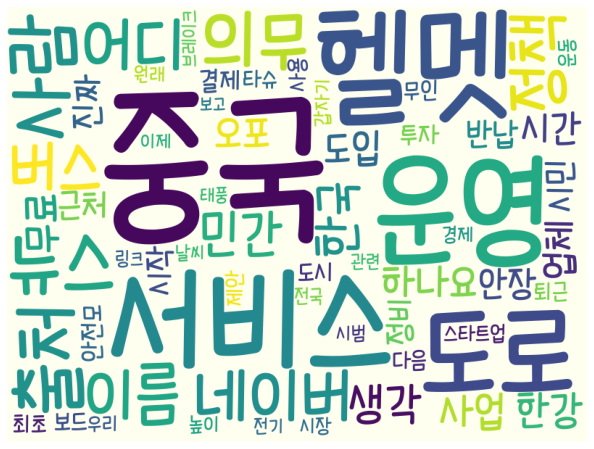

In [28]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(15,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 워드클라우드 png저장
wc.to_file('data/wordcloud3_twitter.png')